## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

from keras import layers
import os
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import cv2

C:\Users\ninad\miniconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Summary

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def find_max_pixel(img_gray, chan=1):
    if chan==3:
        rows,cols,_ = img_gray.shape
    else:
        rows,cols = img_gray.shape
    maxs = -1
    for i in range(rows):
        for j in range(cols):
            k = img_gray[i,j]
            if chan > 1:
                if max(k)>maxs:
                    maxs = max(k)
            else:
                if k>maxs:
                    maxs = k
    return maxs

In [6]:
def vis(X,y, stop = 5):
    i = 0
    for img,label in zip(X,y):
        plt.figure()
        print(label)
        plt.imshow(img)
        if i == stop:
            break
        i+=1

In [7]:
main_data_path = os.path.join(os.getcwd(), "")
data_path = os.path.join(main_data_path, "train_tr")
print(data_path)

model_path = os.path.join(os.getcwd(), "model_zoo")
print(model_path)


C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\train_tr
C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo


In [8]:
class DLModel():
    def __init__(self):
        self.number_of_classes = 10
        self.input_shape = (28,28,1)
        self.make_model()

    def make_model(self):
        num_classes = 10
        inputs = keras.Input(shape=(28, 28, 1))

        inputs_tl = keras.layers.Cropping2D(cropping=((0, 14), (0, 14)))(inputs)
        tl_1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs_tl)
        tl_2 = layers.MaxPooling2D(pool_size=(2, 2))(tl_1)
        tl_3 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(tl_2)
        tl_4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(tl_3)
        tl_5 = keras.layers.Flatten()(tl_4)
        tl_6 = keras.layers.Dropout(0.5)(tl_5)
        outputs_tl = keras.layers.Dense(num_classes, activation="softmax")(tl_6)
        self.q1 = keras.Model(inputs = inputs_tl, outputs=outputs_tl)

        inputs_tr = keras.layers.Cropping2D(cropping=((0, 14), (14, 0)))(inputs)
        tr_1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs_tr)
        tr_2 = layers.MaxPooling2D(pool_size=(2, 2))(tr_1)
        tr_3 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(tr_2)
        tr_4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(tr_3)
        tr_5 = keras.layers.Flatten()(tr_4)
        tr_6 = keras.layers.Dropout(0.5)(tr_5)
        outputs_tr = keras.layers.Dense(num_classes, activation="softmax")(tr_6)
        self.q2 = keras.Model(inputs = inputs_tr, outputs=outputs_tr)

        inputs_bl = keras.layers.Cropping2D(cropping=((14, 0), (0, 14)))(inputs)
        bl_1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs_bl)
        bl_2 = layers.MaxPooling2D(pool_size=(2, 2))(bl_1)
        bl_3 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(bl_2)
        bl_4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(bl_3)
        bl_5 = keras.layers.Flatten()(bl_4)
        bl_6 = keras.layers.Dropout(0.5)(bl_5)
        outputs_bl = keras.layers.Dense(num_classes, activation="softmax")(bl_6)
        self.q3 = keras.Model(inputs = inputs_bl, outputs=outputs_bl)

        inputs_br = keras.layers.Cropping2D(cropping=((14, 0), (14, 0)))(inputs)
        br_1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs_br)
        br_2 = layers.MaxPooling2D(pool_size=(2, 2))(br_1)
        br_3 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(br_2)
        br_4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(br_3)
        br_5 = keras.layers.Flatten()(br_4)
        br_6 = keras.layers.Dropout(0.5)(br_5)
        outputs_br = keras.layers.Dense(num_classes, activation="softmax")(br_6)
        self.q4 = keras.Model(inputs = inputs_br, outputs=outputs_br)

        concate = keras.layers.concatenate([outputs_tl, outputs_tr, outputs_bl, outputs_br])
        output = keras.layers.Dense(units=num_classes, activation="softmax")(concate)
        
        self.comb = keras.Model(inputs = concate, outputs=output)

        self.model = keras.Model(inputs = inputs, outputs=output)
    
    def make_quart_model(self):
        num_classes = 10
        inputs = keras.Input(shape=(14, 14, 1))

        x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dropout(0.5)(x)
        output = keras.layers.Dense(num_classes, activation="softmax")(x)

        return keras.Model(inputs = inputs, outputs=output)

    def make_comb_model(self):
        num_classes = 10
        inputs_tl = keras.Input(num_classes)
        inputs_tr = keras.Input(num_classes)
        inputs_bl = keras.Input(num_classes)
        inputs_br = keras.Input(num_classes)

        concate = keras.layers.concatenate([inputs_tl, inputs_tr, inputs_bl, inputs_br])
        output = keras.layers.Dense(units=num_classes, activation="softmax")(concate)

        multiple_input_model = keras.Model(inputs = [inputs_tl, inputs_tr, inputs_bl, inputs_br], outputs=output)

        return multiple_input_model
    
    def input_data(self, x_train, y_train, x_test, y_test, input_shape):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.input_shape = input_shape


    def preprocess_data(self, custom_data=None, input=None):
        if custom_data is None:
            # Scale images to the [0, 1] range
            self.x_train = self.x_train.astype("float32") / 255
            self.x_test = self.x_test.astype("float32") / 255

            self.x_train = np.expand_dims(self.x_train, -1)
            self.x_test = np.expand_dims(self.x_test, -1)

            self.y_train = tf.keras.utils.to_categorical(self.y_train, self.number_of_classes)
            self.y_test = tf.keras.utils.to_categorical(self.y_test, self.number_of_classes)
        else:
            if input:
                custom_data = custom_data.astype("float32") / 255
                custom_data = np.expand_dims(custom_data, -1)
            else:
                custom_data = tf.keras.utils.to_categorical(custom_data, self.number_of_classes)
            return custom_data


    def train(self, model_path):
        self.full_model_path = os.path.join(model_path, "full")
        self.q1_model_path = os.path.join(model_path, "q1")
        self.q2_model_path = os.path.join(model_path, "q2")
        self.q3_model_path = os.path.join(model_path, "q3")
        self.q4_model_path = os.path.join(model_path, "q4")
        self.comb_model_path = os.path.join(model_path, "comb")
        model_exists = False
        try:
            model = tf.keras.models.load_model(self.full_model_path)
            model_exists = True
        except:
            print("Model doesn\'t exists. Training it.")
            model_exists = False
        if model_exists:
            self.model = model
        else:
            batch_size = 128
            epochs = 15
            self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
            self.model.fit(self.x_train, self.y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

            self.model.save(self.full_model_path)
            self.q1.save(self.q1_model_path)
            self.q2.save(self.q2_model_path)
            self.q3.save(self.q3_model_path)
            self.q4.save(self.q4_model_path)
            self.comb.save(self.comb_model_path)


        # score = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        # print("Test loss:", score[0])
        # print("Test accuracy:", score[1])

    def test(self):
        print("Loading saved model:")
        model_v = tf.keras.models.load_model(self.full_model_path)

        print("Evaluating model on test set:")
        score = model_v.evaluate(self.x_test, self.y_test, verbose=0)
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])


    def get_model(self):
        return self.model


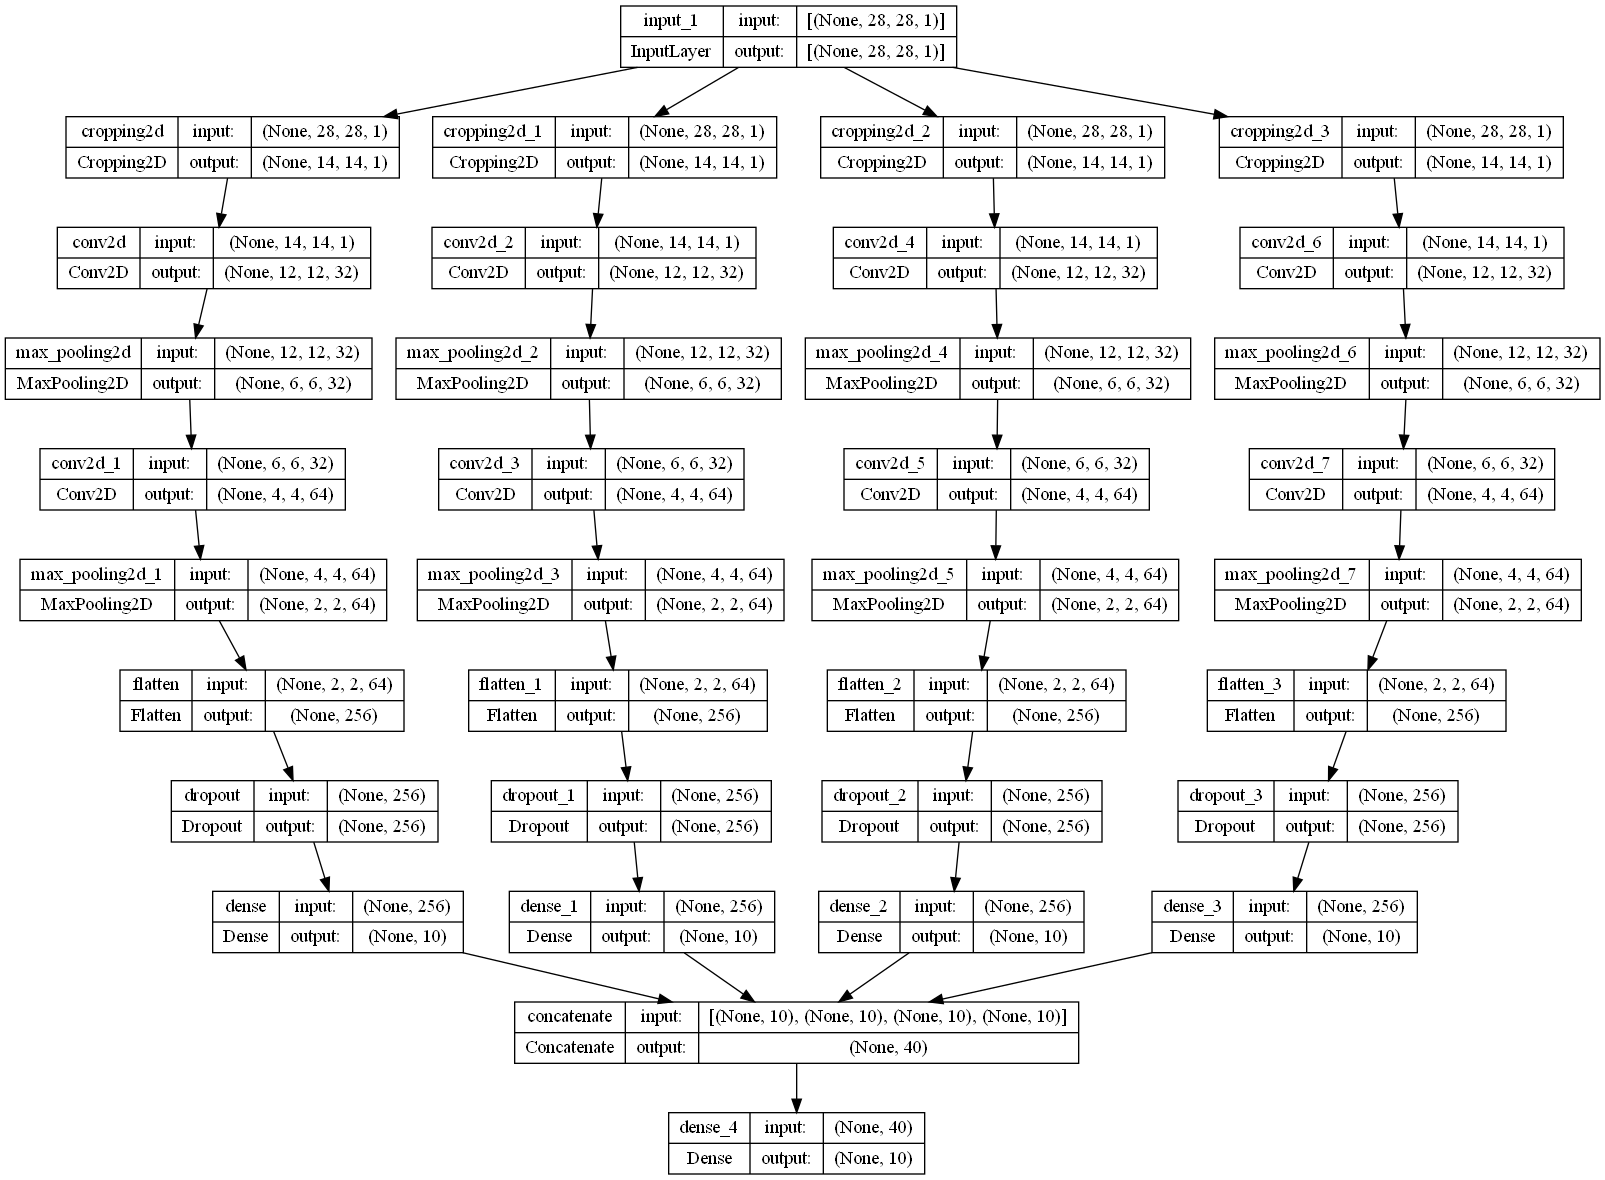

In [9]:
test_model = DLModel()
keras.utils.plot_model(test_model.model, 'model.png',show_shapes=True,show_layer_names=True)

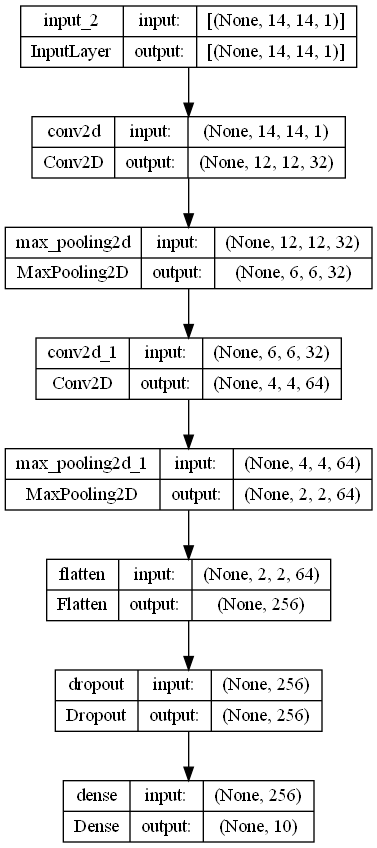

In [10]:
test_quart = test_model.q1
keras.utils.plot_model(test_quart, 'quart.png',show_shapes=True,show_layer_names=True)

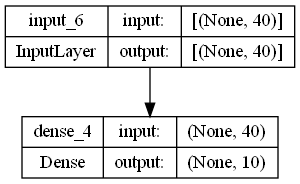

In [11]:
test_comb = test_model.comb
keras.utils.plot_model(test_comb, 'comb.png',show_shapes=True,show_layer_names=True)

In [12]:
test_model.model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 cropping2d (Cropping2D)        (None, 14, 14, 1)    0           ['input_1[0][0]']                
                                                                                                  
 cropping2d_1 (Cropping2D)      (None, 14, 14, 1)    0           ['input_1[0][0]']                
                                                                                                  
 cropping2d_2 (Cropping2D)      (None, 14, 14, 1)    0           ['input_1[0][0]']                
                                                                                            

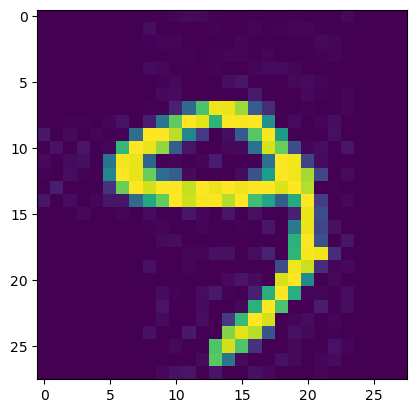

In [13]:
X = []
y = []
for label_num in os.listdir(data_path):
    if label_num != ".DS_Store":
#         print(label_num)
        for image_name in os.listdir(os.path.join(data_path, label_num)):
            if ".jpg" in image_name:
                image_path = os.path.join(data_path, label_num, image_name)
                image = cv2.imread(image_path)
#                 print(image.shape, find_max_pixel(image,3))
                img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#                 print(img_gray.shape, find_max_pixel(img_gray,1))                
#                 img_gray = img_gray.astype("float32") / 255
#                 print(img_gray.shape, find_max_pixel(img_gray,1))
#                plt.imshow(img_gray)
                X.append(img_gray)
                y.append(int(label_num))
#                 break
        
#         break
plt.imshow(img_gray)


In [14]:
x_array = np.asarray(X)
y_array = np.asarray(y)

In [15]:
x_array.shape, y_array.shape

((10000, 28, 28), (10000,))

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(x_array, y_array, test_size = .05)

In [17]:
X_train.shape, X_test.shape, y_train, y_test

((9500, 28, 28),
 (500, 28, 28),
 array([8, 7, 4, ..., 6, 5, 1]),
 array([8, 6, 3, 4, 2, 8, 0, 3, 4, 4, 7, 8, 3, 6, 1, 3, 0, 1, 1, 7, 7, 5,
        3, 2, 7, 0, 0, 7, 4, 3, 2, 7, 8, 7, 7, 5, 8, 5, 5, 6, 5, 9, 4, 1,
        9, 6, 6, 5, 8, 1, 0, 0, 9, 2, 6, 9, 2, 2, 9, 7, 3, 6, 8, 3, 1, 6,
        6, 4, 4, 9, 0, 3, 6, 9, 6, 7, 9, 0, 5, 3, 6, 9, 2, 5, 7, 9, 9, 4,
        0, 1, 7, 3, 3, 5, 7, 5, 3, 6, 1, 2, 6, 5, 6, 7, 0, 2, 0, 3, 4, 8,
        2, 2, 0, 8, 6, 5, 8, 2, 5, 4, 3, 4, 4, 2, 1, 5, 4, 4, 3, 9, 8, 1,
        8, 6, 5, 9, 0, 7, 0, 0, 0, 2, 1, 3, 1, 4, 3, 5, 5, 4, 6, 5, 5, 0,
        1, 1, 1, 8, 6, 1, 6, 2, 7, 2, 8, 2, 8, 9, 5, 2, 4, 9, 6, 0, 2, 0,
        1, 7, 0, 1, 4, 9, 1, 7, 9, 3, 6, 3, 5, 5, 7, 4, 9, 2, 9, 5, 8, 1,
        8, 4, 3, 2, 0, 7, 4, 5, 4, 7, 0, 0, 3, 9, 2, 7, 8, 6, 4, 4, 9, 3,
        0, 4, 8, 1, 2, 8, 3, 7, 4, 4, 9, 0, 3, 0, 0, 7, 3, 5, 0, 6, 6, 2,
        8, 1, 6, 4, 2, 9, 7, 0, 9, 5, 7, 4, 0, 3, 2, 3, 9, 4, 1, 1, 9, 9,
        2, 0, 1, 2, 3, 3, 9, 7, 6, 8, 1, 7, 7,

# Model training

In [18]:
classifier = DLModel()

In [19]:
classifier.input_data(X_train, y_train, X_test, y_test, (28, 28, 1))

In [20]:
classifier.preprocess_data()

In [21]:
classifier.train(model_path)

Model doesn't exists. Training it.
Epoch 1/15
67/67 [==============================] - 3s 25ms/step - loss: 2.1451 - accuracy: 0.3106 - val_loss: 1.8892 - val_accuracy: 0.5295
Epoch 2/15
67/67 [==============================] - 1s 16ms/step - loss: 1.7516 - accuracy: 0.6060 - val_loss: 1.5327 - val_accuracy: 0.7137
Epoch 3/15
67/67 [==============================] - 1s 18ms/step - loss: 1.4753 - accuracy: 0.7284 - val_loss: 1.2965 - val_accuracy: 0.8063
Epoch 4/15
67/67 [==============================] - 2s 26ms/step - loss: 1.2696 - accuracy: 0.7894 - val_loss: 1.1258 - val_accuracy: 0.8316
Epoch 5/15
67/67 [==============================] - 3s 38ms/step - loss: 1.1094 - accuracy: 0.8129 - val_loss: 0.9784 - val_accuracy: 0.8537
Epoch 6/15
67/67 [==============================] - 2s 24ms/step - loss: 0.9836 - accuracy: 0.8312 - val_loss: 0.8603 - val_accuracy: 0.8642
Epoch 7/15
67/67 [==============================] - 2s 28ms/step - loss: 0.8759 - accuracy: 0.8456 - val_loss: 0.7661 -

INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\full\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\full\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q1\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q1\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q2\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q2\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q3\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q3\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q4\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\q4\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\comb\assets


INFO:tensorflow:Assets written to: C:\Users\ninad\OneDrive\Desktop\ASU\Courses\Fall 2022\CSE 535\M3\training\model_zoo\comb\assets


In [22]:
classifier.test()

Loading saved model:
Evaluating model on test set:
Test loss: 0.3757125437259674
Test accuracy: 0.9279999732971191


In [23]:
test_q1 = keras.models.load_model(classifier.q1_model_path)

In [ ]:
test_q2 = keras.models.load_model(classifier.q2_model_path)


In [ ]:
test_q3 = keras.models.load_model(classifier.q3_model_path)


In [ ]:
test_q4 = keras.models.load_model(classifier.q4_model_path)
